# Mall customer segmentation

Customer segmentation at a mall using K-means.
The unsupervised K-means clustering algorithm can be used to find groups. This is especially useful in a business cases in order to identify groups which have not been specifically labeled in the dataset.


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
df = df.rename(columns = {'Genre':'Gender'})

In [93]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [94]:
df.shape

(200, 5)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [96]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- There are no null values in the dataset, however the CustomerID feature is not necessary to perform a K-means segmentation, so this feature should be dropped

In [97]:
df.drop(["CustomerID"], axis=1, inplace = True)

In [98]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


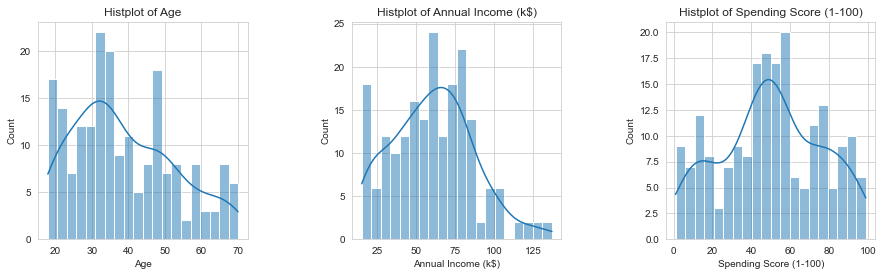

In [103]:
plt.figure(1, figsize=(15,4))
n=0

for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df[x], bins=20, kde=True)
    plt.title(f"Histplot of {x}")
    
plt.show()

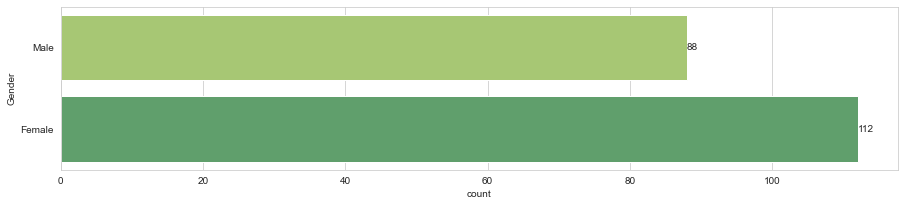

In [104]:
plt.figure(figsize=(15,3))
ax = sns.countplot(y="Gender", data=df, palette="summer_r")
ax.bar_label(ax.containers[0]);

- The countplot shows that there are 112 Female and 88 Male customers

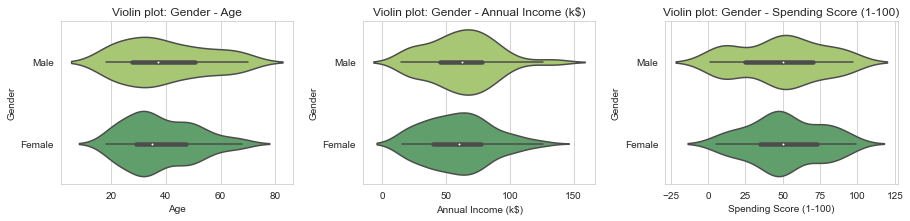

In [105]:
plt.figure(1, figsize=(15,3))
n=0
for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n +=1
    plt.subplot(1,3,n)
    sns.set_style("whitegrid")
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    sns.violinplot(x = cols, y = "Gender", data=df, palette='summer_r')
    plt.title(f"Violin plot: Gender - {cols}")
    
plt.show()

- The median age for male customers is slightly higher
- The first quartile for both Male and Female is the highest point and centered around age 30

- The Annual Income for both genders have a similar distribution, but only Males have an annual income over 150 k

- The median for spending score is similar for both genders

## Age brackets

In [106]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[(df.Age >= 55)]


In [107]:
agex = ['18-25', '26-35', '36-45', '46-55', '55+']
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]


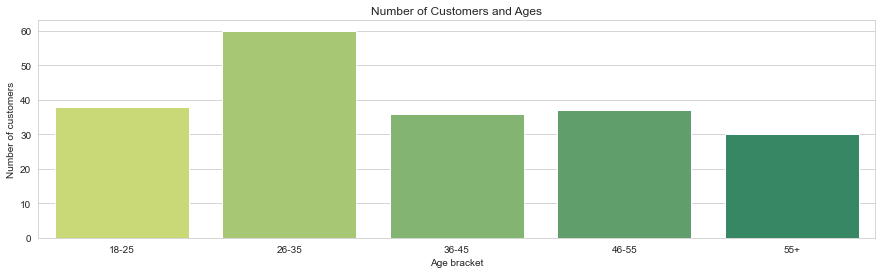

In [115]:
plt.figure(figsize=(15,4))
sns.barplot(x = agex, y = agey, palette="summer_r")
plt.title("Number of Customers and Ages")
plt.xlabel("Age bracket")
plt.ylabel("Number of customers")
plt.show()

The largest group of customers is the age between 26-35

## Annual income and spending score correlation

<Figure size 504x504 with 0 Axes>

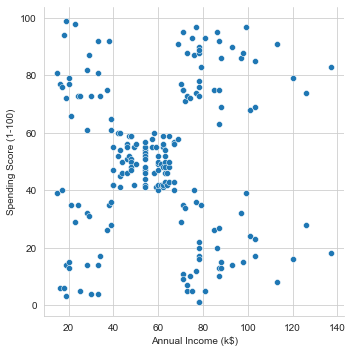

In [110]:
plt.figure(figsize=(7,7))
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

- There is some relationship between people with an annual income of 40-60k. This group has a spending score between 40-60

## Spending Score

In [111]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) &(df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) &(df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) &(df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) &(df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) &(df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

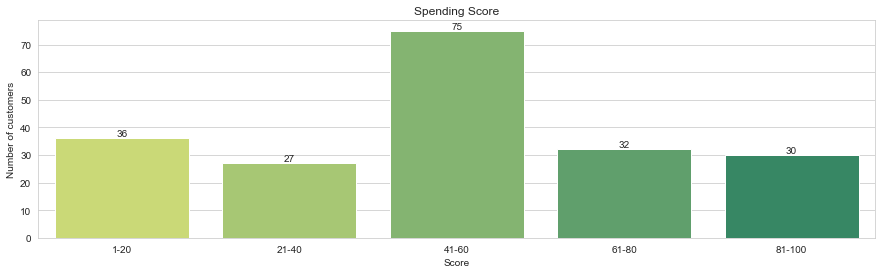

In [114]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x=ssx, y=ssy, palette="summer_r")
ax.bar_label(ax.containers[0]);
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of customers")
plt.show()

In [83]:
print(f"{ssy[2] / sum(ssy)*100}% of customers have a spending score between {ssx[2]}")

37.5% of customers have a spending score between 41-60


### Annual income

In [116]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

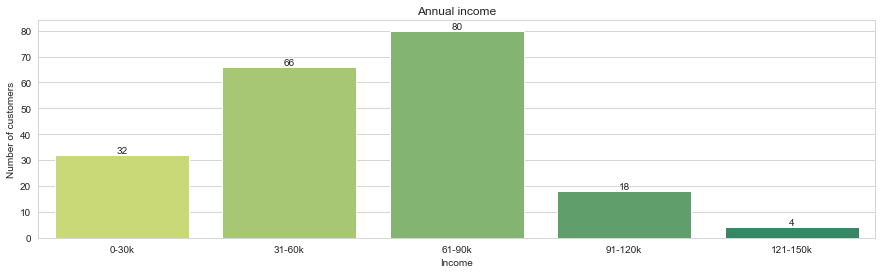

In [117]:
aix = ["0-30k", "31-60k", "61-90k", "91-120k", "121-150k"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,4))
ax = sns.barplot(x=aix, y=aiy, palette="summer_r")
ax.bar_label(ax.containers[0])
plt.title("Annual income")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()

- The majority of customers have an annual income between 31-90k
- Only 4 customers have an income over 120k

# KMeans

## Find the optimal number of clusters

WCSS = Within-Cluster Sum of Square
- It is the sum of squared distance between each point and the centroid of the cluster

### Age - Spending Score

In [89]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

In [118]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

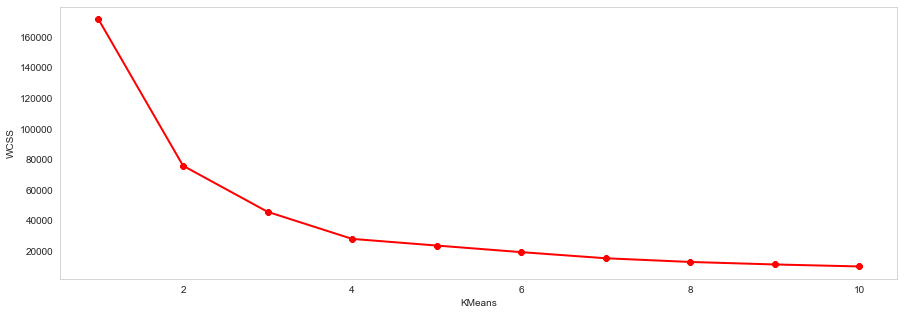

In [120]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel("KMeans")
plt.ylabel("WCSS")
plt.show()

Using the elbow method, we can see that the ***optimal number of clusters for Age and Spending Score is 4***

In [121]:
kmeans = KMeans(n_clusters=4)

In [132]:
label = kmeans.fit_predict(X1)
print(label)

[4 2 3 2 4 2 3 2 3 2 3 2 3 2 3 2 1 4 1 2 1 2 3 2 3 2 1 4 1 2 3 2 3 2 3 2 3
 2 3 2 0 2 1 4 1 4 0 4 4 4 0 4 4 0 1 1 0 0 4 0 0 4 0 0 0 4 1 0 4 4 0 1 0 0
 0 4 1 1 4 1 0 4 0 1 4 1 0 4 4 1 0 4 1 1 4 4 1 4 1 4 4 1 0 4 0 4 0 0 0 0 0
 4 1 4 4 4 0 0 1 0 4 1 4 2 4 2 1 2 3 2 3 2 4 2 3 2 3 2 3 2 3 2 4 2 3 2 1 2
 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 1 2 3 2 1 4 3 2 3 2 3 2 3 2 3 2 1 2 3 2 1
 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2]


In [126]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


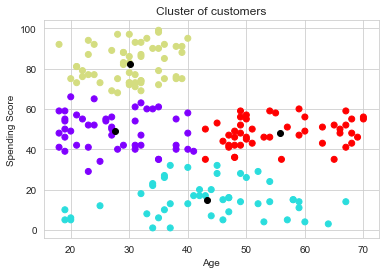

In [127]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Cluster of customers")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

### Annual Income - Spending Score

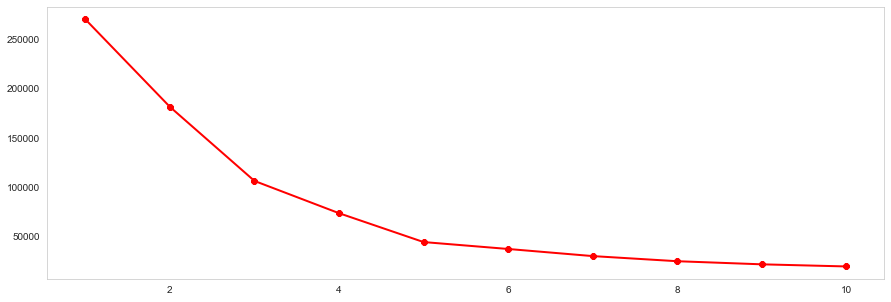

In [130]:
X2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color="red", marker="8")

plt.show()

The ***optimal number of clusters for Annual Income and Spending Score is 5***

In [133]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [134]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]]


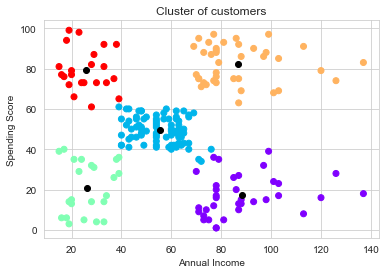

In [135]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

**Consider Age, Annual Income and Spending Score together**

In [136]:
X3 = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X3.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


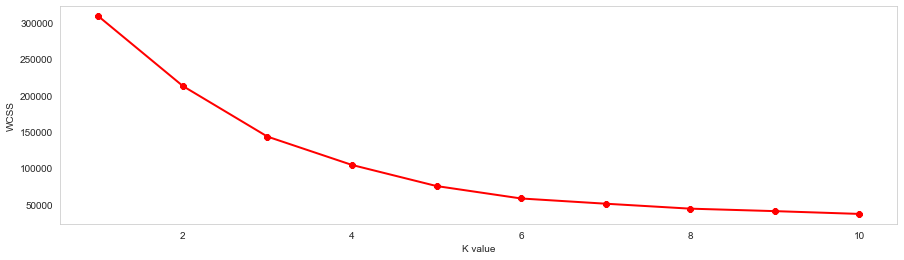

In [137]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,4))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

The ***optimal number of clusters considering for Annual Income, Age and Spending Score is 5***

In [138]:
kmeans= KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [139]:
print(kmeans.cluster_centers_)

[[40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [45.2173913  26.30434783 20.91304348]]


We have three variables and therefore have 3 columns

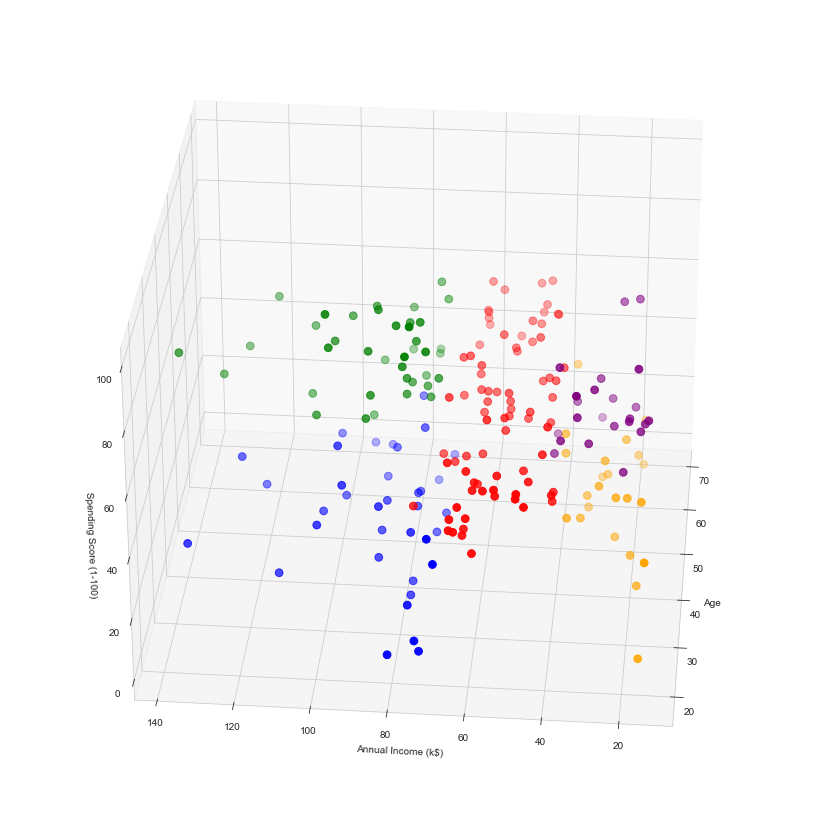

In [140]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c="blue", s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c="red", s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c="orange", s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c="green", s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c="purple", s=60)


ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()


This graph shows the 5 clusters in a 3D map